<a href="https://colab.research.google.com/github/Abhilash11Addanki/DeepLearning/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [ ]:
#Printing the shapes of train and test data
print(train_images.shape,train_labels.shape)
print(test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


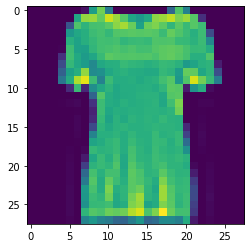

In [ ]:
plt.imshow(train_images[10])

In [ ]:
#Normalizing the train and test data
train_images = train_images/255
test_images = test_images/255

In [ ]:
#Defining the layers
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(units = 512,activation = tf.nn.relu),
                                    tf.keras.layers.Dense(units = 10,activation = tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
#Defining a callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs = {}):
    if(logs.get('loss')<0.15):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
model.fit(train_images,train_labels,epochs = 50,callbacks = [myCallback()])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5883 - accuracy: 0.7929
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3602 - accuracy: 0.8691
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3193 - accuracy: 0.8817
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3025 - accuracy: 0.8864
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2828 - accuracy: 0.8938
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2596 - accuracy: 0.9038
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2536 - accuracy: 0.9053
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2394 - accuracy: 0.9091
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2253 - accuracy: 0.9154
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.220

In [ ]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3562 - accuracy: 0.8918


[0.35622355341911316, 0.8917999863624573]